In [1]:
from math import pi, prod
from oscar import Landscape, QiskitExecutor, BPDNReconstructor
import numpy as np
import networkx as nx
from qiskit.algorithms.optimizers import COBYLA
from qiskit_aer.primitives import Sampler
from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit.utils import algorithm_globals
from qiskit_optimization.applications import Maxcut
import matplotlib.pyplot as plt

In [2]:
n = 8
p = 2
seed = 42
beta_resolution, gamma_resolution = 10, 10
beta_bounds, gamma_bounds = (-pi / 8, pi / 8), (-pi / 4, pi / 4)
sampling_fraction = 1 / 10

landscape = Landscape(
    [beta_resolution] * p + [gamma_resolution] * p, 
    [beta_bounds] * p + [gamma_bounds] * p
)

In [3]:
graph = nx.random_regular_graph(3, n, seed)
problem = Maxcut(graph).to_quadratic_program()
H, offset = problem.to_ising()

In [4]:
algorithm_globals.random_seed = seed
algorithm = QAOA(Sampler(run_options={"seed": seed, "shots": None}), COBYLA(), reps=p)

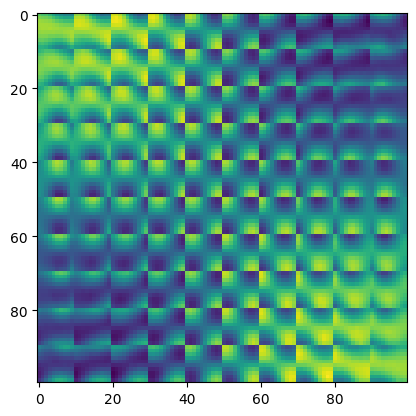

In [5]:
# may take some time
landscape.sample_and_run(QiskitExecutor(algorithm, H), sampling_fraction)
landscape.reconstruct(BPDNReconstructor())
plt.imshow(landscape.landscape.reshape(prod(landscape.shape[:p]), -1))

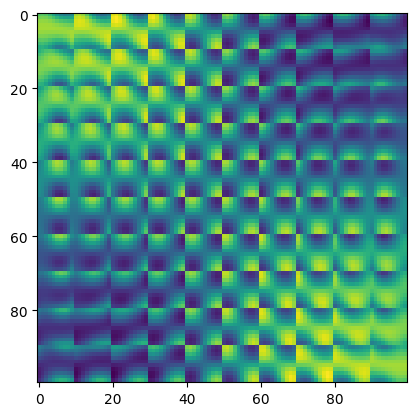

In [6]:
# may take some time
exact_landscape = Landscape.like(landscape)
exact_landscape.run_all(QiskitExecutor(algorithm, H))
plt.imshow(exact_landscape.landscape.reshape(prod(landscape.shape[:p]), -1))